# Download the CIFAR-10 Dataset

We will download the CIFAR-10 Dataset directly from the website

In [ ]:
import os
import urllib.request
import tarfile

In [ ]:
def download_and_extract(url, download_directory):
  # Create the download directory if it does not exist
  os.makedirs(download_directory, exist_ok = True)

  # Extract the file name from the URL
  file_name = os.path.join(download_directory, url.split("/")[-1])

  # Check if the file already exists
  if not os.path.exists(file_name):
    urllib.request.urlretrieve(url, file_name)

    # Extract the content
    with tarfile.open(file_name, 'r:gz') as tar:
      tar.extractall(download_directory)

In [ ]:
# URL
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

# This line is to store the data into the sub-directory
download_directory = "./data"

# We use a function in download to download it
download_and_extract(url, download_directory)

# Loading the raw files

We will split the dataset that we just download into training dataset and testing dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [ ]:
# A program to extract all the files

import pickle
import numpy as np
import os
import platform

def load_pickle(f):
  version = platform.python_version_tuple() # Check the version of the Python

  if version[0] == '2':
    return pickle.load(f)

  elif version[0] == '3':
    return pickle.load(f, encoding = 'latin1')

  raise ValueError(f"Invalid Python Version: {version}")

def load_CIFAR_batch(filename):
  with open(filename, 'rb') as f:
    datadict = load_pickle(f)
    X = datadict["data"]
    y = datadict["labels"]
    X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
    y = np.array(y)
    return X, y

def load_CIFAR10(ROOT):
  xs = []
  ys = []
  for b in range(1, 6):
    f = os.path.join(ROOT, "data_batch_%d" % (b, ))
    X, y = load_CIFAR_batch(f)
    xs.append(X)
    ys.append(y)
  Xtr = np.concatenate(xs)
  ytr = np.concatenate(ys)
  del X, y
  Xte, yte = load_CIFAR_batch(os.path.join(ROOT, "test_batch"))
  return Xtr, ytr, Xte, yte

In [ ]:
cifar10_directory = "./data/cifar-10-batches-py" # Why we know this? Go to the directory and see
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_directory)


In [ ]:
# Checking the size of the dataset
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000,)


In [ ]:
X_train[1, 1]

array([[140., 160., 169.],
       [145., 153., 154.],
       [125., 125., 118.],
       [124., 129., 132.],
       [150., 161., 173.],
       [152., 164., 175.],
       [174., 188., 200.],
       [178., 189., 196.],
       [134., 139., 137.],
       [110., 111., 102.],
       [133., 127., 120.],
       [163., 156., 156.],
       [192., 192., 187.],
       [218., 219., 215.],
       [240., 241., 238.],
       [245., 246., 245.],
       [241., 242., 239.],
       [238., 239., 235.],
       [234., 235., 229.],
       [226., 227., 220.],
       [142., 143., 136.],
       [ 96.,  97.,  85.],
       [ 99., 101.,  84.],
       [ 95.,  96.,  87.],
       [ 89.,  89.,  86.],
       [ 80.,  81.,  77.],
       [ 65.,  67.,  60.],
       [ 84.,  86.,  76.],
       [ 92.,  95.,  80.],
       [ 96.,  99.,  78.],
       [ 77.,  80.,  62.],
       [ 71.,  73.,  61.]])

# Visualize the dataset first

We will visualize the dataset a bit to get a sense of it

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images(images, labels, class_names, num_images = 10):
  plt.figure(figsize = (15, 3))
  for i in range(num_images):
    plt.subplot(1, num_images, i + 1);
    plt.imshow(images[i]);
    plt.title(class_names[labels[i]])
    plt.axis("off")
  plt.show()

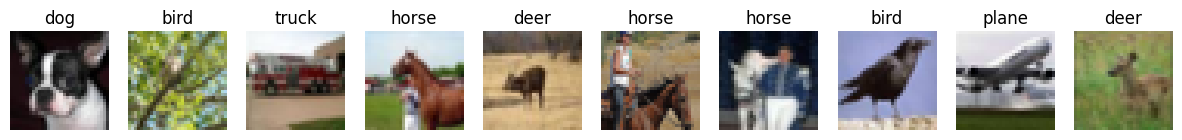

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_plot_images = 10
random_indices = np.random.randint(0, len(X_train), num_plot_images)
min_pixel_value = np.min(X_train[random_indices])
max_pixel_value = np.max(X_train[random_indices])
scaled_values = ((X_train[random_indices] - min_pixel_value) / (max_pixel_value - min_pixel_value)) * 255.0
X_plot = np.clip(X_train[random_indices], 0, 255).astype(np.uint8)
plot_images(X_plot, y_train[random_indices], classes, num_plot_images)

# Subsample Data
Iterate over 60000 images and labels are too much, so we will take a small portion of the whole dataset to work with.

In [ ]:
num_training = 2000
train_indices = np.random.choice(len(X_train), num_training, replace = False)
X_train = X_train[train_indices]
y_train = y_train[train_indices]
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (2000, 32, 32, 3)
Shape of y_train: (2000,)


In [ ]:
# We perform a similar thing for testing dataset
num_testing = 100
test_indices = np.random.choice(len(X_test), num_testing, replace = False)
X_test = X_test[test_indices]
y_test = y_test[test_indices]
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_test: (100, 32, 32, 3)
Shape of y_test: (100,)


# Reshape Data
The data now has 32x32 in size, and 3 layers. That are just too tired to train. We want to make it simple, we will flatten all the X_train and X_test. Bear in mind that 32 x 32 x 3 = 3072, so we expect shape[1] to be 3072

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [ ]:
print(f"Shape of X_train now: {X_train.shape}")
print(f"Shape of X_test now: {X_test.shape}")

Shape of X_train now: (2000, 3072)
Shape of X_test now: (100, 3072)


# KNN Implementation

We will self-implement a simple KNN model first

In [ ]:
from numpy.core.multiarray import result_type
import pandas as pd
import scipy.sparse as sparse
from scipy import stats
class KNN():
  def __init__(self, k, p):
    """
    k: value for k-nearest neighbor
    p: value for computing distance metric
    """
    self.k = k
    self.p = p

  def fit(self, X_train, y_train):
    """
    X_train: shape of [num_of_X_train, 3072]
    y_train: shape of [num_of_y_train]
    """
    self.X_train = X_train
    self.y_train = y_train

  def compute_minkowski_distance(self, X_test):
    X_test_reshaped = np.expand_dims(X_test, axis = 1)
    X_train_reshaped = np.expand_dims(self.X_train, axis = 0)
    prel_output = np.power(np.absolute(X_train_reshaped - X_test_reshaped), self.p, dtype = float)
    before_output = np.sum(prel_output, axis = 2)
    dist = np.power(before_output, 1/(self.p), dtype = float)

    return dist # Shape must be: (num_test_samples, num_train_samples)

  def find_k_nearest_neighbor_labels(self, X_test):
    dist = self.compute_minkowski_distance(X_test)
    sort_result = np.argsort(dist, axis = 1)
    sort_result = sort_result[:, :(self.k)]
    k_nearest_neighbor_labels = np.take(self.y_train, sort_result)

    return k_nearest_neighbor_labels # Shape must be: (num_test_samples, )

  def predict(self, X_test):
    k_nearest_neighbor_labels = self.find_k_nearest_neighbor_labels(X_test)
    result = stats.mode(k_nearest_neighbor_labels, axis = 1, keepdims = False)
    test_predict = result[0]
    return test_predict # Shape must be: (num_test_samples, )

With k = 5, p = 1, the accuracy is: 0.26
With k = 10, p = 1, the accuracy is: 0.29
With k = 25, p = 1, the accuracy is: 0.31
With k = 50, p = 1, the accuracy is: 0.27
With k = 100, p = 1, the accuracy is: 0.26


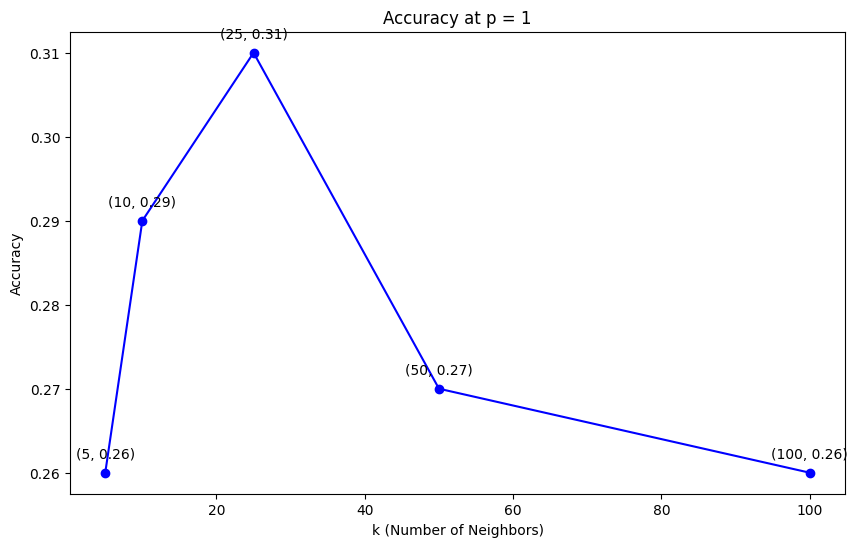

With k = 5, p = 2, the accuracy is: 0.2
With k = 10, p = 2, the accuracy is: 0.2
With k = 25, p = 2, the accuracy is: 0.29
With k = 50, p = 2, the accuracy is: 0.29
With k = 100, p = 2, the accuracy is: 0.27


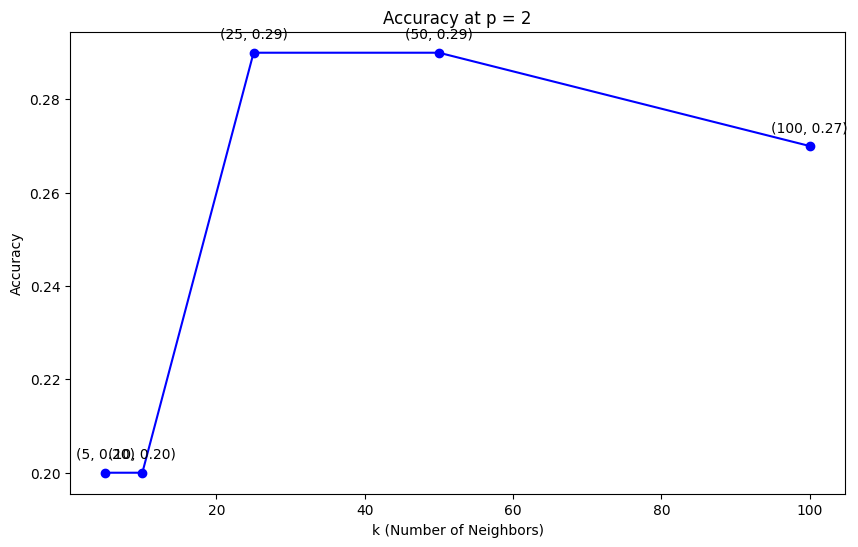

With k = 5, p = 3, the accuracy is: 0.19
With k = 10, p = 3, the accuracy is: 0.23
With k = 25, p = 3, the accuracy is: 0.24
With k = 50, p = 3, the accuracy is: 0.25
With k = 100, p = 3, the accuracy is: 0.24


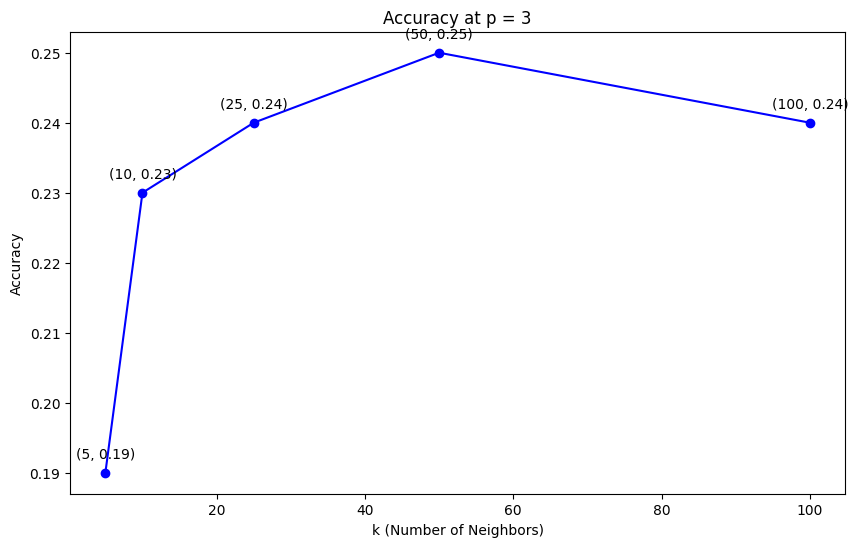

In [ ]:
# Grand Implementation!

k_list = [5, 10, 25, 50, 100]
p_list = [1, 2, 3]
accuracy_list = []
for j in range(len(p_list)):
  p_here = 0;
  for i in range(len(k_list)):
    knn_model = KNN(k_list[i], p_list[j])
    p_here = p_list[j]
    knn_model.fit(X_train, y_train)
    y_test_predicted = knn_model.predict(X_test)
    num_correct = np.sum(y_test_predicted == y_test)
    accuracy = float(num_correct)/num_testing
    accuracy_list.append(accuracy)
    print(f"With k = {k_list[i]}, p = {p_list[j]}, the accuracy is: {accuracy}")
  plt.figure(figsize=(10, 6))
  plt.plot(k_list, accuracy_list, marker = 'o', linestyle = '-', color = 'b')
  for k, acc in zip(k_list, accuracy_list):
    plt.annotate(f"({k}, {acc:.2f})", (k, acc), textcoords = "offset points", xytext = (0, 10), ha = 'center')
  plt.xlabel("k (Number of Neighbors)")
  plt.ylabel("Accuracy")
  plt.title(f"Accuracy at p = {p_here}")
  plt.show()
  accuracy_list = [] # reinitialize accuracy_list